# Analýza zákazníků

Máme k dispozici seznam zákazníků s jejich osobními informacemi a jejich chováním.

Na trh chceme uvést nový luxusní a drahý výrobek. 

Na které zákazníky máme zaměřit personalizovaný marketing?

# Úkol
- Proveďte základní analýzu dat a jejich vizualizaci
- Proveďte úpravu dat (encoding)
- Vyberte vhodné proměnné, podle kterých půjdou zákazníci segmentovat
- Vytvořte k-mean model s vhodným počtem segmentů
- Vizualizujte model
- Který segment je cílový?

# Načtení dat

In [32]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [33]:
data = pd.read_csv('..\\dataset\\Mall_Customers.csv')

# Popis  dat
- informace o datech
- náhled na data
- základní statistika
- zobrazení distribuce dat

In [34]:
# 2. Popis dat
print("\nInformace o datech:")
print(data.info())
print("\nPrvních 5 řádků dat:")
print(data.head())
print("\nZákladní statistiky:")
print(data.describe())


Informace o datech:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Prvních 5 řádků dat:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Základn

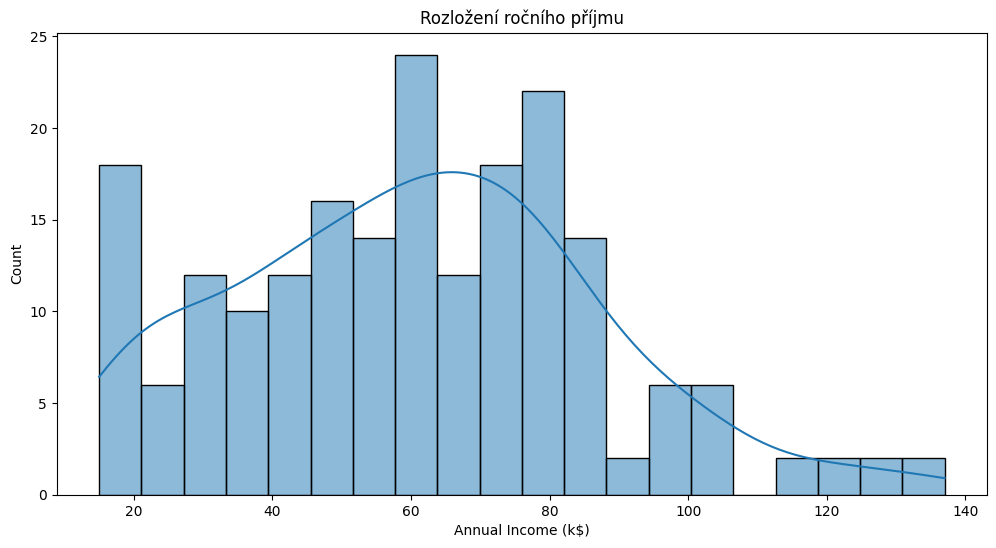

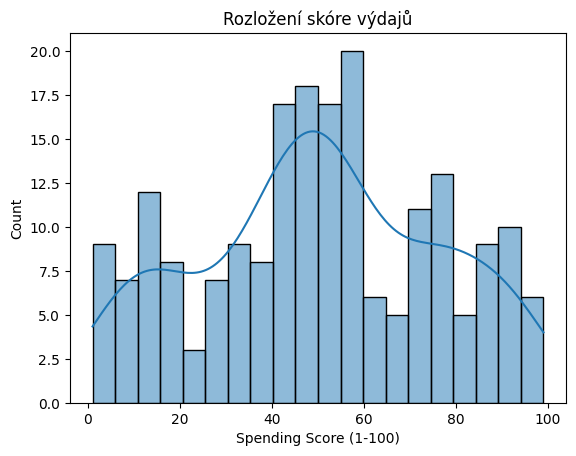

In [35]:
# Vizualizace rozložení dat
plt.figure(figsize=(12, 6))
sns.histplot(data['Annual Income (k$)'], bins=20, kde=True)
plt.title('Rozložení ročního příjmu')
plt.show()

sns.histplot(data['Spending Score (1-100)'], bins=20, kde=True)
plt.title('Rozložení skóre výdajů')
plt.show()

# Příprava dat
- ošetření NaN hodnot
- encodování textových sloupců

In [36]:
# 3. Úprava dat
# Kontrola na chybějící hodnoty
data = data.dropna()

In [37]:
# Kódování textových dat
from sklearn.calibration import LabelEncoder


encoder = LabelEncoder()
data['Gender'] = encoder.fit_transform(data['Gender'])

# Výběr proměnných
- zobrazení vztahů mezi proměnnými (pairplot)
- hledáme kombinaci proměnných, které lze opticky ropzdělit do skupin
- vytvoření X pouze s těmito sloupci

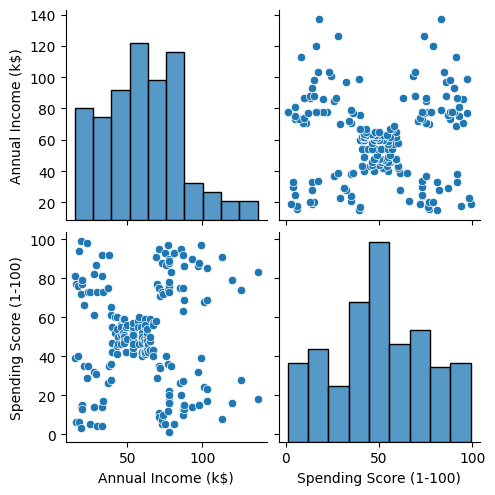

In [38]:
# 4. Výběr proměnných
sns.pairplot(data[['Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

In [39]:
# X - pouze kvantitativní proměnné
from sklearn.discriminant_analysis import StandardScaler


X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Zjištění parametru modelu k-mean
- vykreslení elbow grafu
- zjištění ideálního počtu clusterů

In [40]:
# 5. Zjištění počtu klastrů (Elbow metoda)
from sklearn.cluster import KMeans


inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

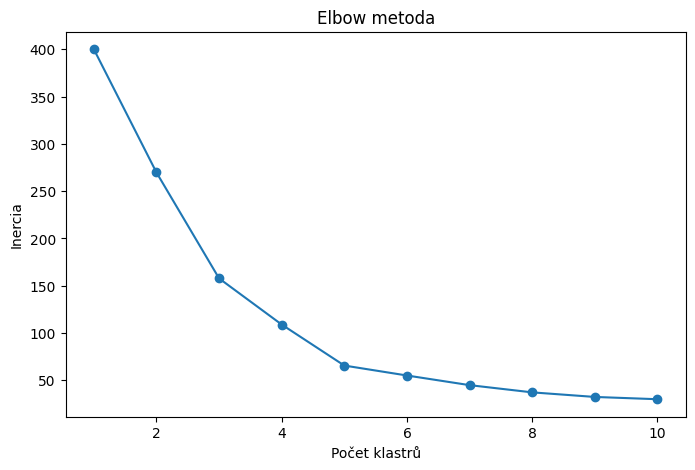

In [41]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Počet klastrů')
plt.ylabel('Inercia')
plt.title('Elbow metoda')
plt.show()

# k-mean model pro zjištěný počet clusterů
- natrénování modelu
- predikce dat

In [42]:
# 6. Trénování K-means s optimálním počtem klastrů
optimal_k = 5  # Vybráno na základě Elbow grafu
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Vizualizace modelu
- vykreslení obarvených skupin grafů

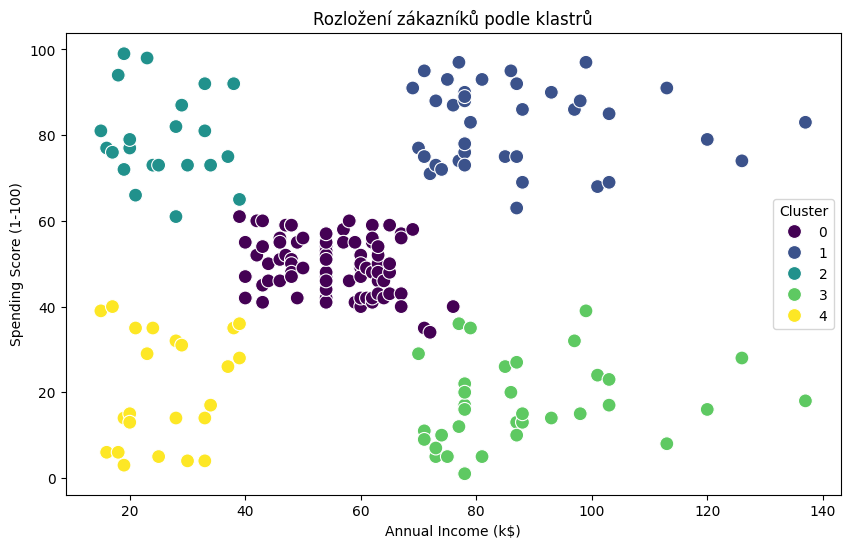

In [43]:
# 7. Vizualizace klastrů
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=data['Annual Income (k$)'], 
    y=data['Spending Score (1-100)'], 
    hue=data['Cluster'], 
    palette='viridis', 
    s=100)
plt.title('Rozložení zákazníků podle klastrů')
plt.show()

## Výklad modelu
- Popište jednotlivé skupiny
- Na jaké zákazníky se zaměřit?

In [44]:
# 8. Interpretace klastrů
for cluster in range(optimal_k):
    print(f"\nKlaster {cluster}:")
    print(data[data['Cluster'] == cluster].describe())


Klaster 0:
       CustomerID     Gender        Age  Annual Income (k$)  \
count   81.000000  81.000000  81.000000           81.000000   
mean    86.320988   0.407407  42.716049           55.296296   
std     24.240889   0.494413  16.447822            8.988109   
min     44.000000   0.000000  18.000000           39.000000   
25%     66.000000   0.000000  27.000000           48.000000   
50%     86.000000   0.000000  46.000000           54.000000   
75%    106.000000   1.000000  54.000000           62.000000   
max    143.000000   1.000000  70.000000           76.000000   

       Spending Score (1-100)  Cluster  
count               81.000000     81.0  
mean                49.518519      0.0  
std                  6.530909      0.0  
min                 34.000000      0.0  
25%                 44.000000      0.0  
50%                 50.000000      0.0  
75%                 55.000000      0.0  
max                 61.000000      0.0  

Klaster 1:
       CustomerID     Gender        Age

In [45]:
# Výběr cílového segmentu (vysoký příjem, vysoké skóre výdajů)
target_cluster = data.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()
print("\nPrůměrné hodnoty klastrů:")
print(target_cluster)


Průměrné hodnoty klastrů:
         Annual Income (k$)  Spending Score (1-100)
Cluster                                            
0                 55.296296               49.518519
1                 86.538462               82.128205
2                 25.727273               79.363636
3                 88.200000               17.114286
4                 26.304348               20.913043


In [46]:
# Pravděpodobně cílový segment - zákazníci s vysokým příjmem a vysokými výdaji
best_cluster = target_cluster.sort_values(['Annual Income (k$)', 'Spending Score (1-100)'], ascending=[False, False]).index[0]
print(f"\nCílový klastr: {best_cluster}")


Cílový klastr: 3
